In [74]:
print("Let's Start our project!")

Let's Start our project!


Import csv and DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/ecommerce_transactions.csv')
# df.info()
# df.describe()
# df.shape
df

Transaction_ID           User_Name  Age    Country Product_Category  \
0                   1            Ava Hall   63     Mexico         Clothing   
1                   2         Sophia Hall   59      India           Beauty   
2                   3     Elijah Thompson   26     France            Books   
3                   4        Elijah White   43     Mexico           Sports   
4                   5          Ava Harris   48    Germany           Beauty   
...               ...                 ...  ...        ...              ...   
49995           49996  Isabella Rodriguez   53      India      Electronics   
49996           49997           Emma Hall   30     France   Home & Kitchen   
49997           49998      Isabella Allen   50  Australia           Beauty   
49998           49999        Olivia Clark   48  Australia          Grocery   
49999           50000       Olivia Harris   70     Canada           Sports   

       Purchase_Amount    Payment_Method Transaction_Date  
0               780.69        Debit Card       2023-04-14  
1               738.56            PayPal       2023-07-30  
2               178.34       Credit Card       2023-09-17  
3               401.09               UPI       2023-06-21  
4               594.83       Net Banking       2024-10-29  
...                ...               ...              ...  
49995           140.09               UPI       2024-08-07  
49996           815.31  Cash on Delivery       2025-02-07  
49997           535.77               UPI       2023-08-11  
49998           370.99  Cash on Delivery       2025-01-02  
49999           577.66       Credit Card       2024-06-03  

[50000 rows x 8 columns]

Data Cleaning

In [3]:
# Drop 2 unused coliumn
df_drop_col = df.drop('Transaction_ID', axis=1)
df_drop_col2 = df_drop_col.drop('User_Name', axis=1)
df_drop_col2

Age    Country Product_Category  Purchase_Amount    Payment_Method  \
0       63     Mexico         Clothing           780.69        Debit Card   
1       59      India           Beauty           738.56            PayPal   
2       26     France            Books           178.34       Credit Card   
3       43     Mexico           Sports           401.09               UPI   
4       48    Germany           Beauty           594.83       Net Banking   
...    ...        ...              ...              ...               ...   
49995   53      India      Electronics           140.09               UPI   
49996   30     France   Home & Kitchen           815.31  Cash on Delivery   
49997   50  Australia           Beauty           535.77               UPI   
49998   48  Australia          Grocery           370.99  Cash on Delivery   
49999   70     Canada           Sports           577.66       Credit Card   

      Transaction_Date  
0           2023-04-14  
1           2023-07-30  
2           2023-09-17  
3           2023-06-21  
4           2024-10-29  
...                ...  
49995       2024-08-07  
49996       2025-02-07  
49997       2023-08-11  
49998       2025-01-02  
49999       2024-06-03  

[50000 rows x 6 columns]

In [4]:
# Adjust age by decades
df_drop_col2['Age'] = (df_drop_col2['Age'] // 10 * 10)
df_drop_col2

Age    Country Product_Category  Purchase_Amount    Payment_Method  \
0       60     Mexico         Clothing           780.69        Debit Card   
1       50      India           Beauty           738.56            PayPal   
2       20     France            Books           178.34       Credit Card   
3       40     Mexico           Sports           401.09               UPI   
4       40    Germany           Beauty           594.83       Net Banking   
...    ...        ...              ...              ...               ...   
49995   50      India      Electronics           140.09               UPI   
49996   30     France   Home & Kitchen           815.31  Cash on Delivery   
49997   50  Australia           Beauty           535.77               UPI   
49998   40  Australia          Grocery           370.99  Cash on Delivery   
49999   70     Canada           Sports           577.66       Credit Card   

      Transaction_Date  
0           2023-04-14  
1           2023-07-30  
2           2023-09-17  
3           2023-06-21  
4           2024-10-29  
...                ...  
49995       2024-08-07  
49996       2025-02-07  
49997       2023-08-11  
49998       2025-01-02  
49999       2024-06-03  

[50000 rows x 6 columns]

Statisical Data

In [86]:
print("Mean is", df_drop_col2['Age'].mean())
print("Meadian is", df_drop_col2['Age'].median())
print("Mean is", df_drop_col2['Purchase_Amount'].mean())
print("Meadian is", df_drop_col2['Purchase_Amount'].median())

Mean is 39.4088
Meadian is 40.0
Mean is 503.15979300000004
Meadian is 503.11


Plot Graph

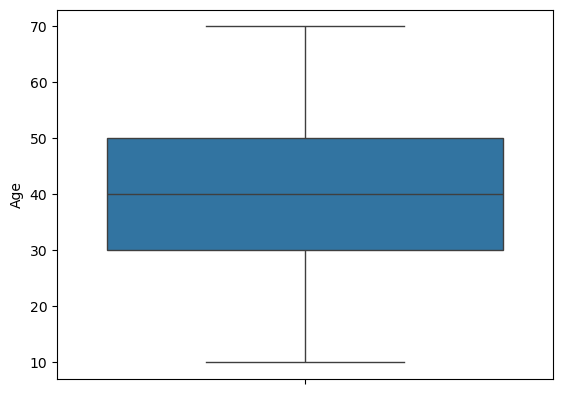

In [87]:
sns.boxplot(df_drop_col2['Age'])
#sns.boxplot(df['Purchase_Amount'])
plt.show ()

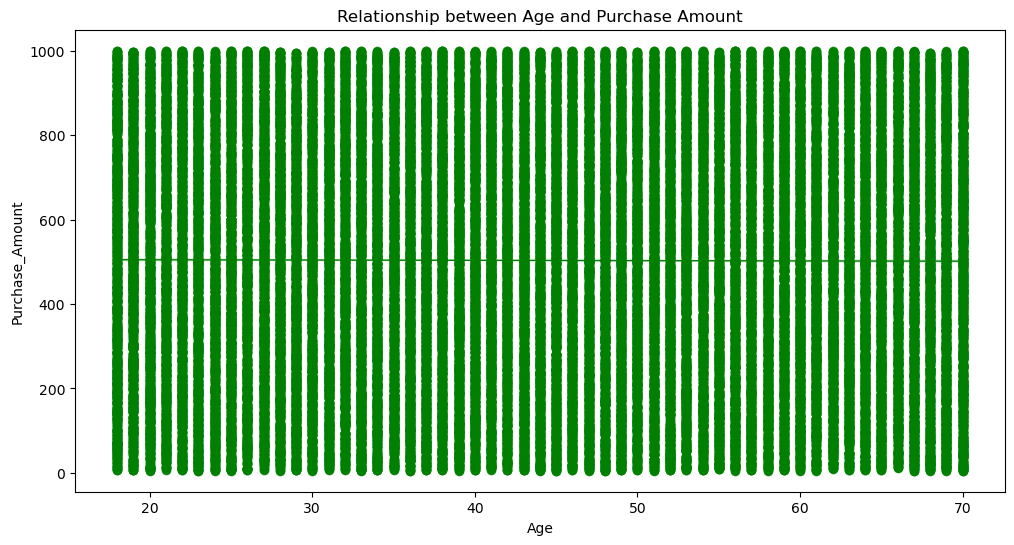

In [5]:
import seaborn as sns

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the scatter plot using Seaborn
sns.scatterplot(x='Age', y='Purchase_Amount', data=df, ax=ax)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Purchase_Amount')
ax.set_title('Relationship between Age and Purchase Amount')

# Fit a linear regression line using Seaborn
sns.regplot(x='Age', y='Purchase_Amount', data=df, ax=ax, color='green', line_kws={'linewidth': 1})
# outlier
# Show the plot
plt.show()

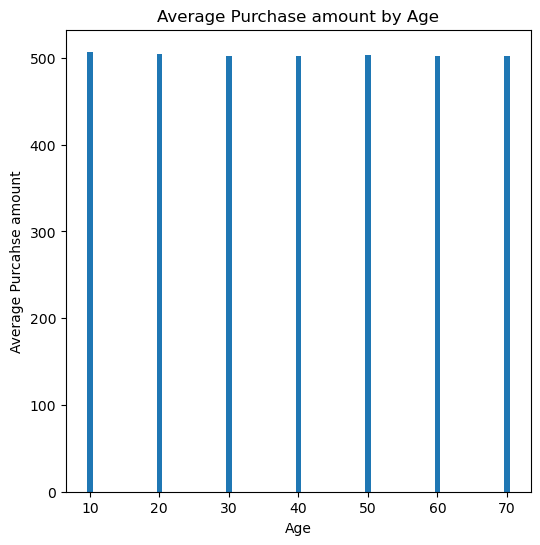

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))

Age_stats = df_drop_col2.groupby('Age')['Purchase_Amount'].mean()
ax.bar(Age_stats.index, Age_stats.values)

ax.set_xlabel('Age')
ax.set_ylabel('Average Purcahse amount')
ax.set_title('Average Purchase amount by Age')

plt.show()

/var/folders/t_/v58h47jj13782cym9sl96ms40000gn/T/ipykernel_2605/754796170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_drop_col2, x = 'Age' ,y ="Purchase_Amount", palette= "deep")


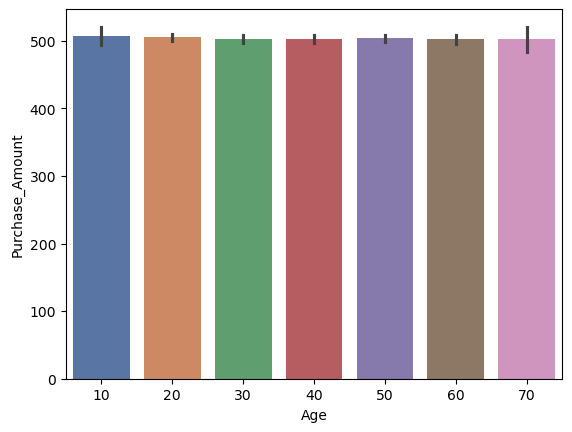

In [6]:
sns.barplot(data=df_drop_col2, x = 'Age' ,y ="Purchase_Amount", palette= "deep")
plt.show()

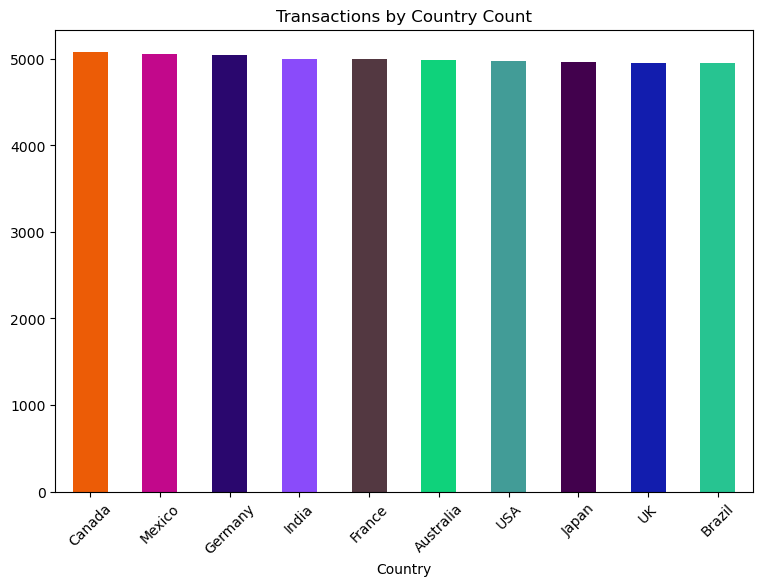

In [7]:
import numpy as np
df_drop_col2.Country.value_counts()
#df_drop_col2.Product_Category.value_counts()
#df_drop_col2.Payment_Method.value_counts()
df_drop_col2.Country.value_counts().plot(kind='bar', figsize=(9,6),color=np.random.rand(10,3))
plt.title('Transactions by Country Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

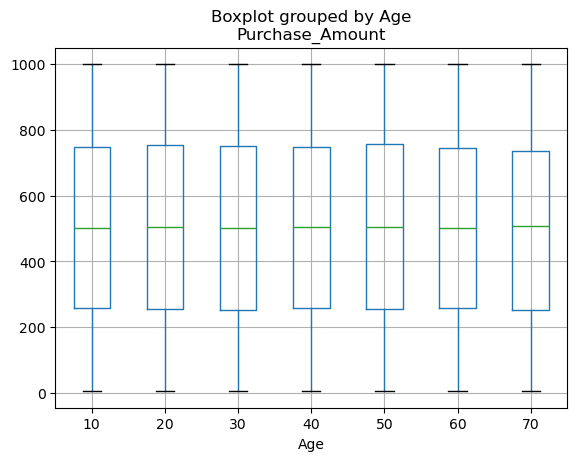

In [8]:
# Boxplot
df_drop_col2.boxplot(column='Purchase_Amount', by='Age')
plt.show()

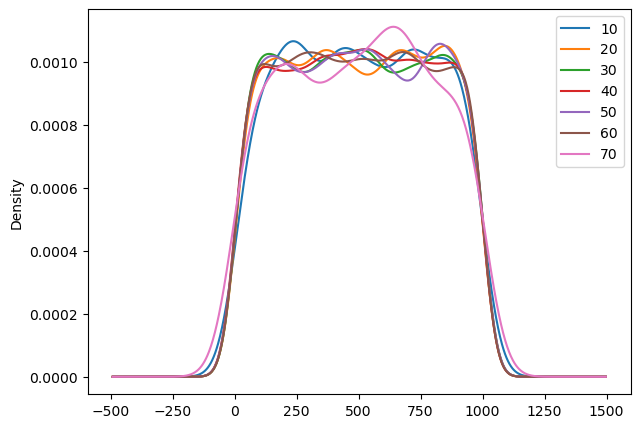

In [94]:
#kde plot - kernel density estimate
df_drop_col2.groupby('Age').Purchase_Amount.plot.kde(figsize=(7,5))
plt.legend(loc='upper right', fontsize=10)
plt.show()

Univariate Analysis

In [95]:
print("Median: ", df_drop_col2["Age"].median()) #.mean(), .std()
df_drop_col2.Age.value_counts()

Median:  40.0


Age
40    9530
30    9527
60    9401
20    9363
50    9336
10    1895
70     948
Name: count, dtype: int64

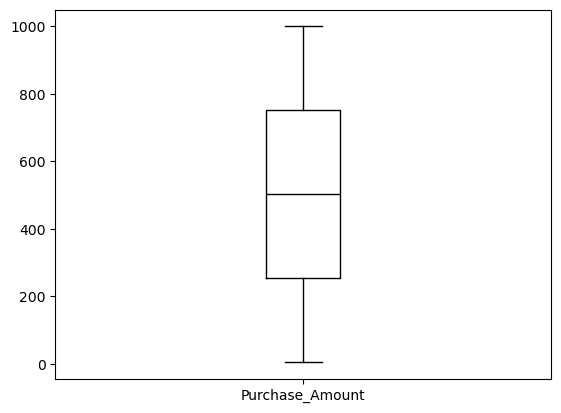

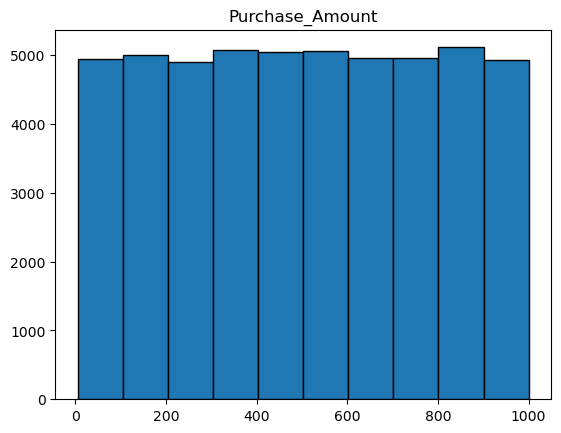

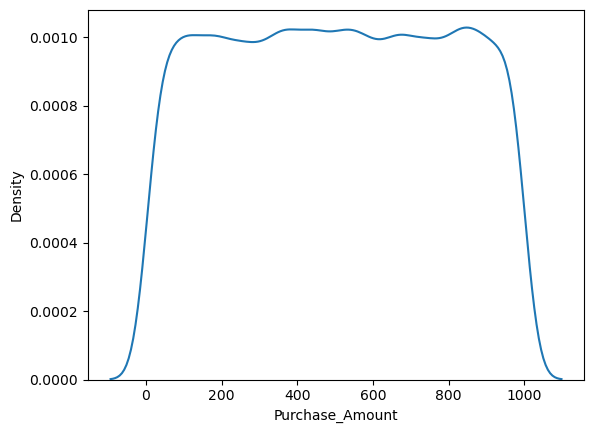

In [96]:
## Univerate analysis 2
import matplotlib.pyplot as plt

#Box plots
df_drop_col2.boxplot(column=['Purchase_Amount'], grid=False, color='black') #Doesn't seem to be working with a list of ints
plt.show()

#Histogram:
df_drop_col2.hist(column='Purchase_Amount', grid=False, edgecolor='black')
plt.show() #Use this when sometime things get buggy

#Density curves:
import seaborn as sns
sns.kdeplot(df['Purchase_Amount']) #KDE = kernal density function 
plt.show()

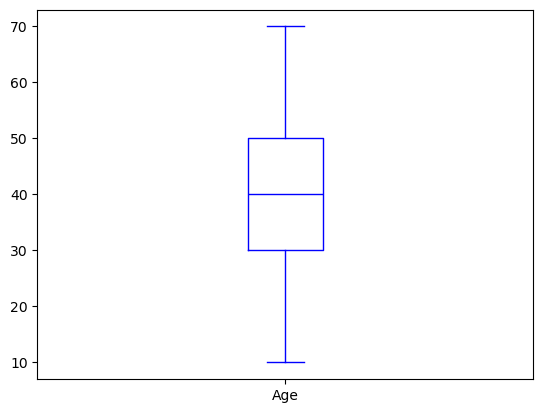

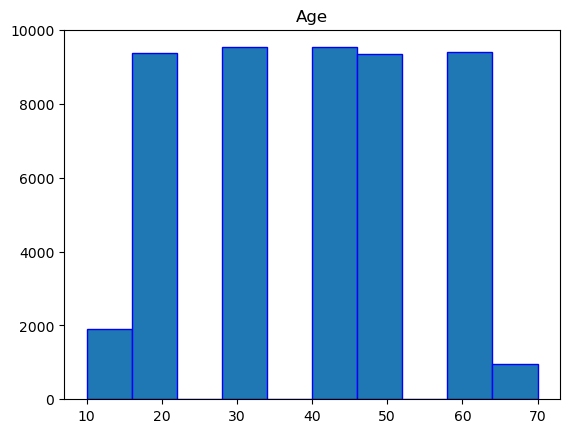

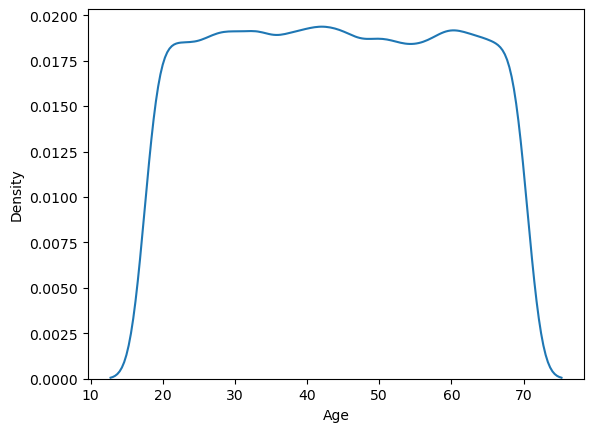

In [97]:
## Univerate analysis continued:
import matplotlib.pyplot as plt

#Box plots
df_drop_col2.boxplot(column=['Age'], grid=False, color='blue') #Doesn't seem to be working with a list of ints
plt.show()

#Histogram:
df_drop_col2.hist(column='Age', grid=False, edgecolor='blue')
plt.show() #Use this when sometime things get buggy

#Density curves:
import seaborn as sns
sns.kdeplot(df['Age']) #KDE = kernal density function 
plt.show()

Bi-variate Analysis

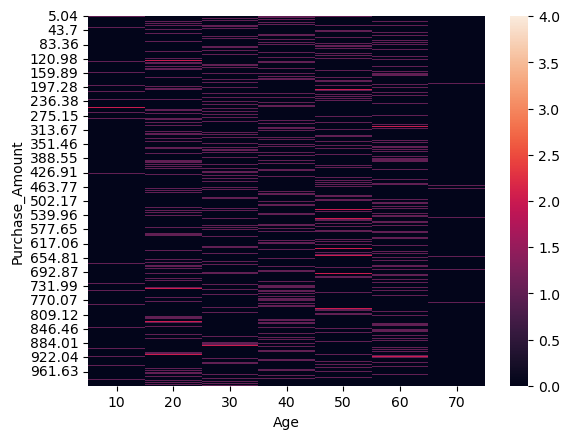

In [99]:
#Bi-variate analysis: #legend
import seaborn as sns
import pandas as pd
sns.heatmap (pd.crosstab(df_drop_col2.Purchase_Amount, df_drop_col2.Age)) #Crosstab = frequency table #Work best with categotical vars/ discrete vars
plt.show()

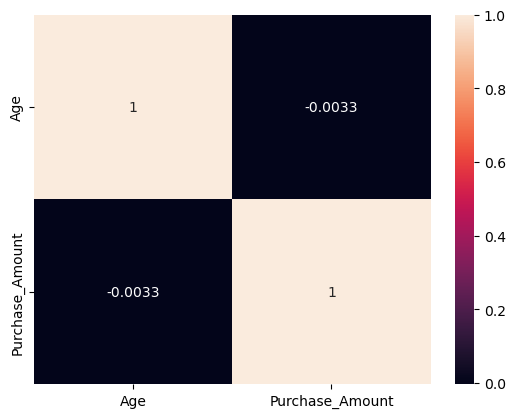

In [100]:
df_drop_col2.corr(numeric_only=True)
sns.heatmap(df_drop_col2.corr(numeric_only=True),annot=True)
plt.show()

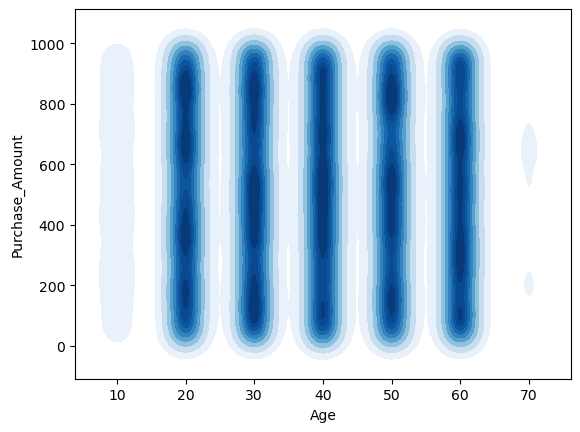

In [101]:
#Bi-variate analysis - Contour plots:
sns.kdeplot(x=df_drop_col2.Age, y=df_drop_col2.Purchase_Amount, cmap="Blues", fill=True, bw_adjust=0.8) # cmp = color map
plt.show()

Multivariate Analysis

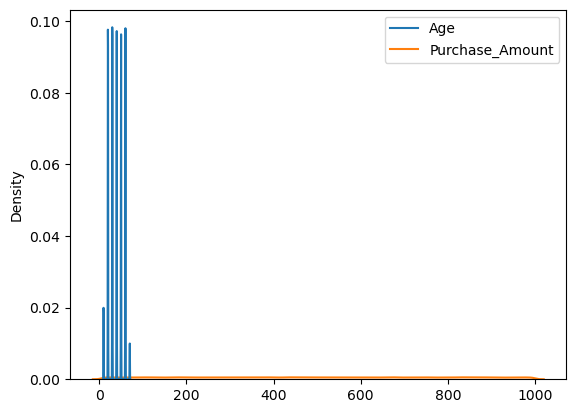

In [102]:
## Multivariate analysis:
import seaborn as sns
sns.kdeplot(data = df_drop_col2, bw_adjust=0.2, fill = False) #KDE = kernal density function  #Can enable shade to be true/false 
plt.show()